In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [2]:
def plot_hist(arr, xlabel) :
    num_bins = np.ceil((max(arr) - min(arr)) / 
                       (2 * (np.percentile(arr, 75) - 
                             np.percentile(arr, 25)) / 
                        np.cbrt(len(arr))))
    plt.hist(arr, density=True, bins=int(num_bins))  
    plt.xlabel(xlabel)
    plt.ylabel('Data')
    plt.title('Distribution of Array Data')
    plt.show()

def standardize (X) :
    means = X.mean(1)
    std = X.std(1)
    return X - np.expand_dims(means,1) / np.expand_dims(std,1) 

def cov_matrix (X) :
    batch_size = X.shape[0]
    return (1/batch_size) * np.dot(X.T, X)

def EigenDecomposition (X) :
    eigenvalues, eigenvectors = np.linalg.eig(X)
    return eigenvectors, eigenvalues

def SortEigen (eValues, eVectors) :
    sorted_indices = np.argsort(eValues)[::-1]
    sorted_eigenvalues = eValues[sorted_indices]
    return eVectors[:, sorted_indices]

def PCA (eVectors, components=2) :
    assert components < eVectors.shape[1]
    return eVectors[:, :components]

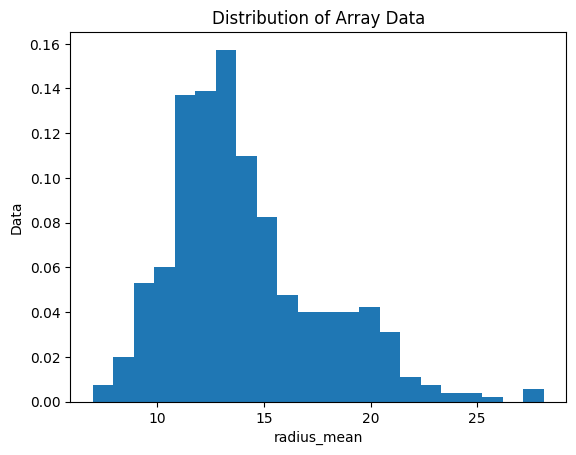

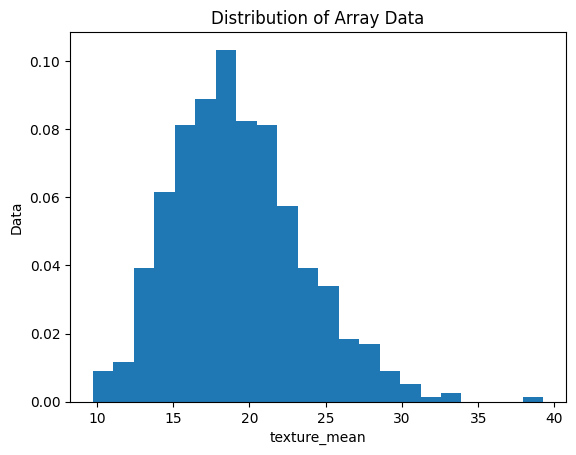

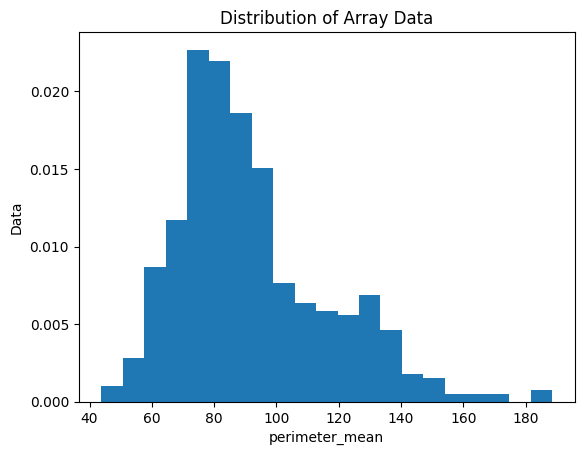

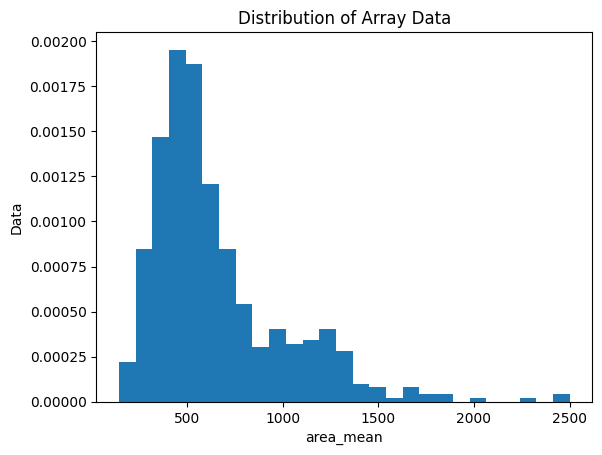

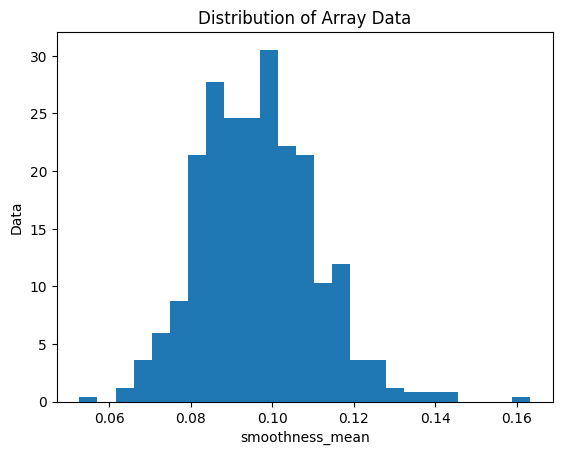

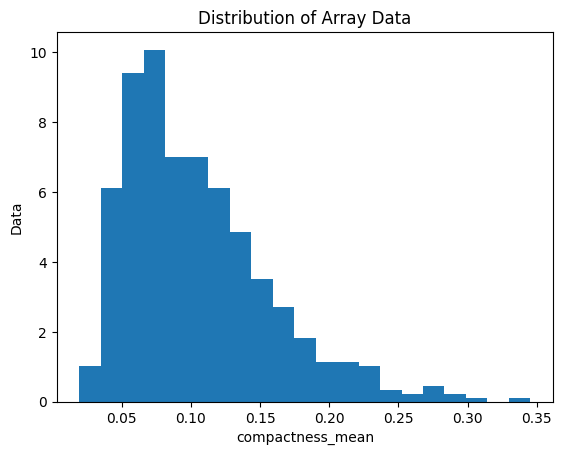

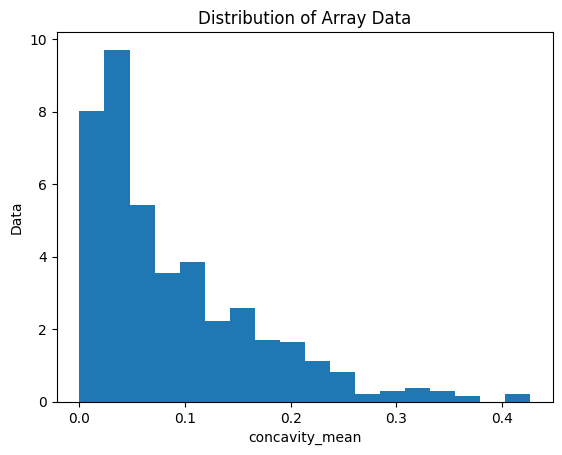

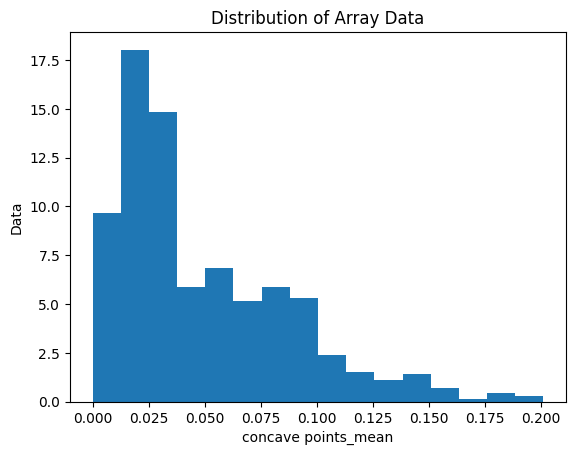

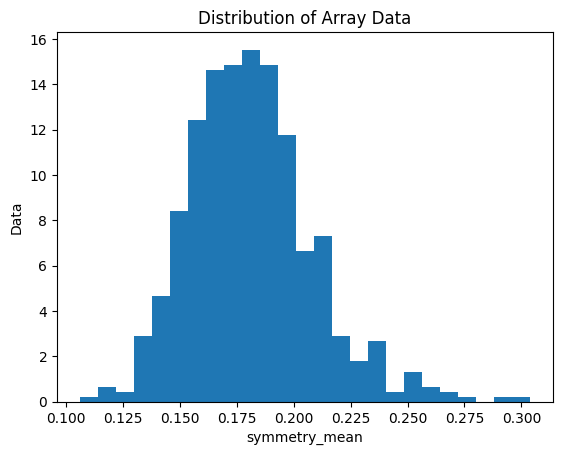

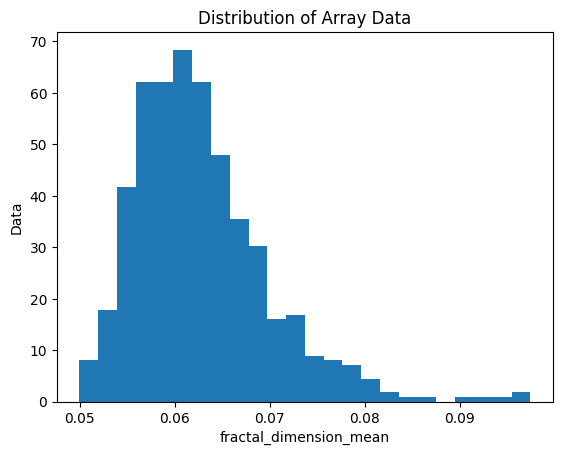

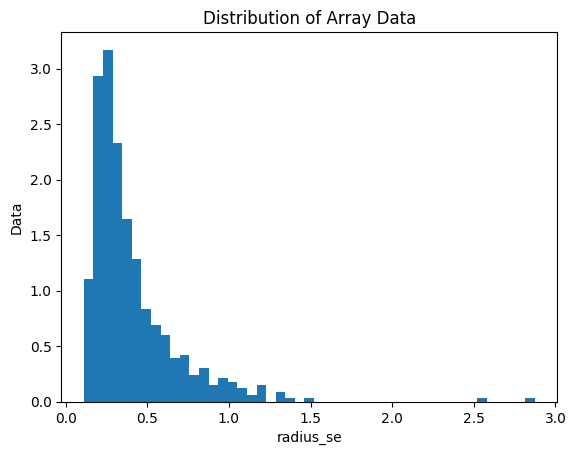

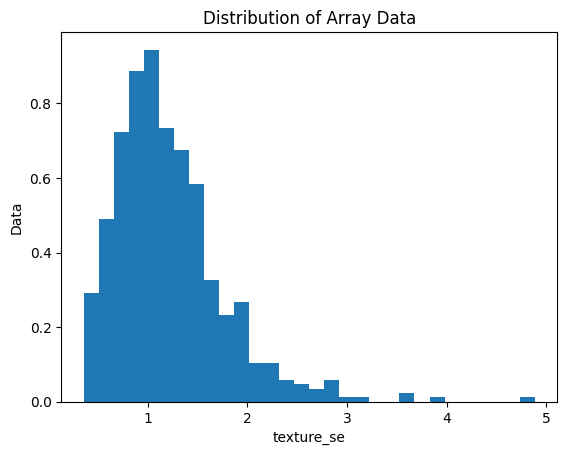

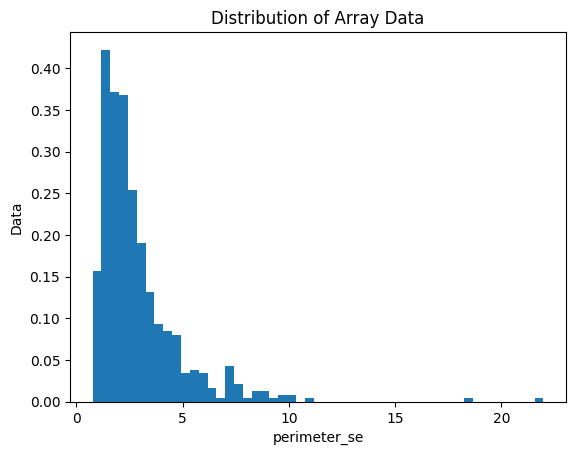

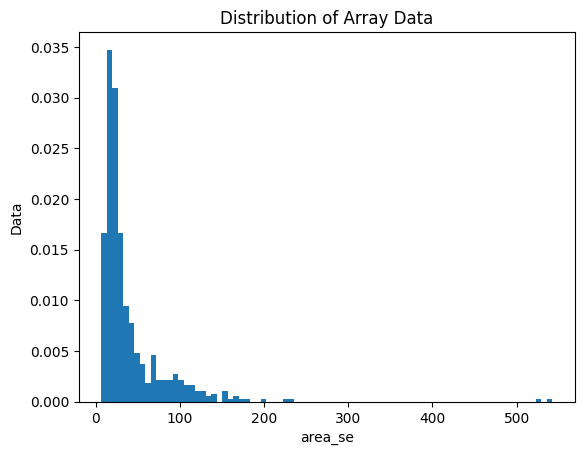

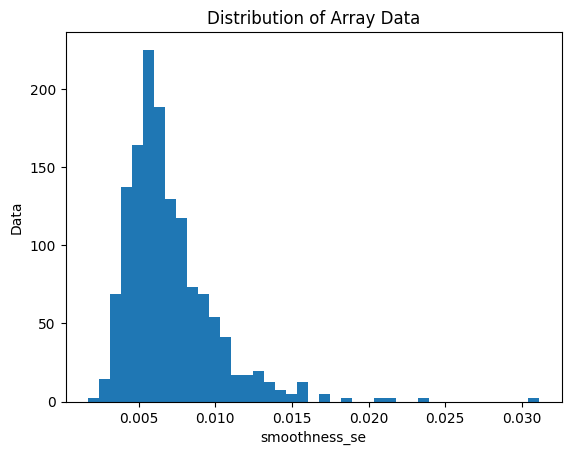

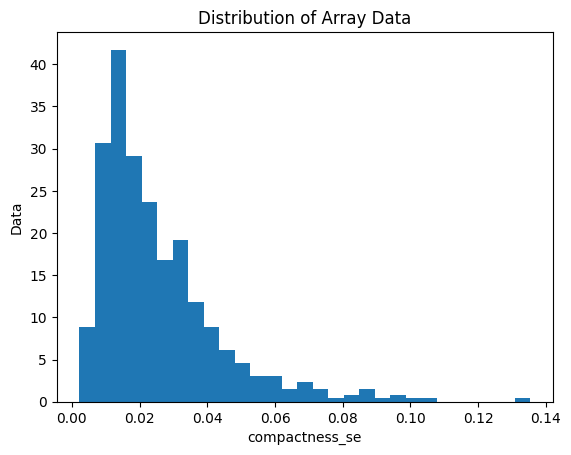

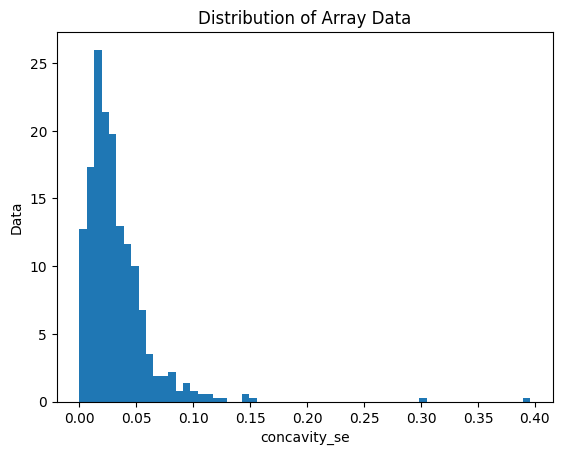

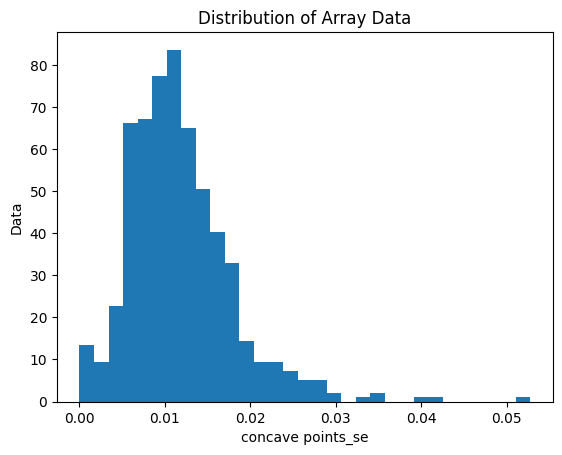

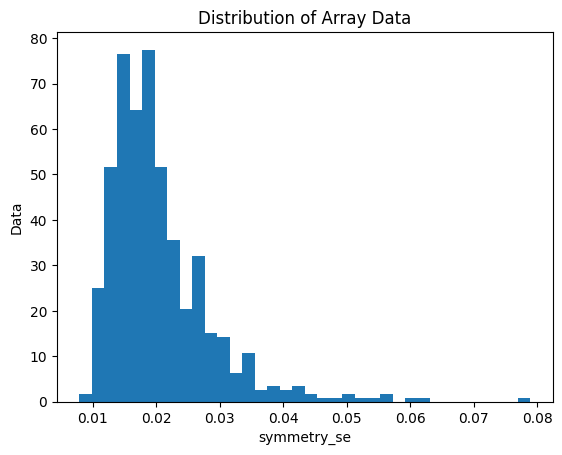

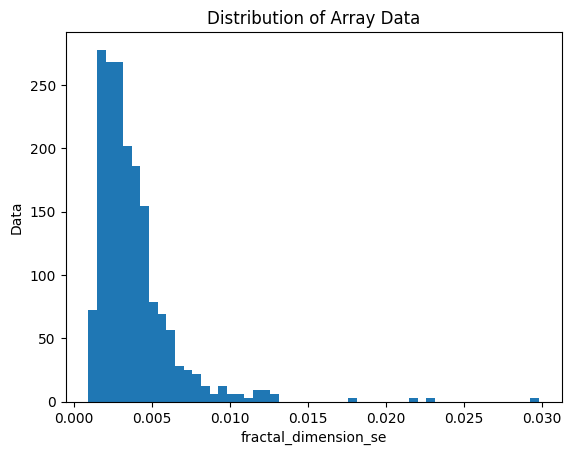

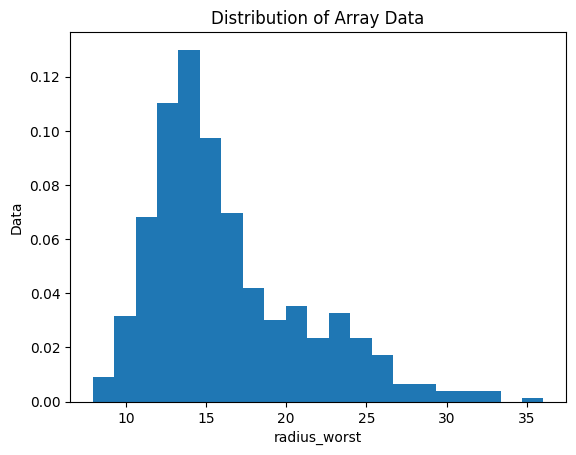

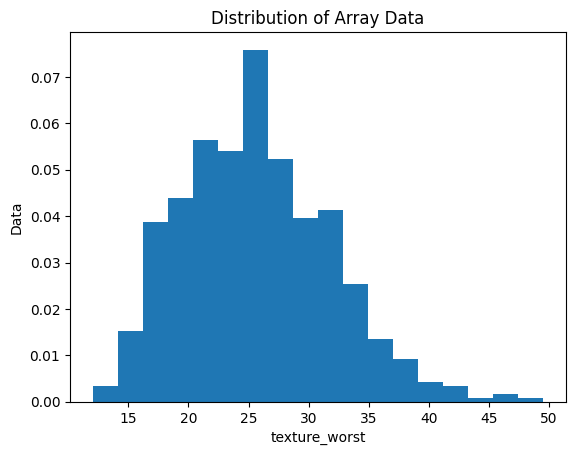

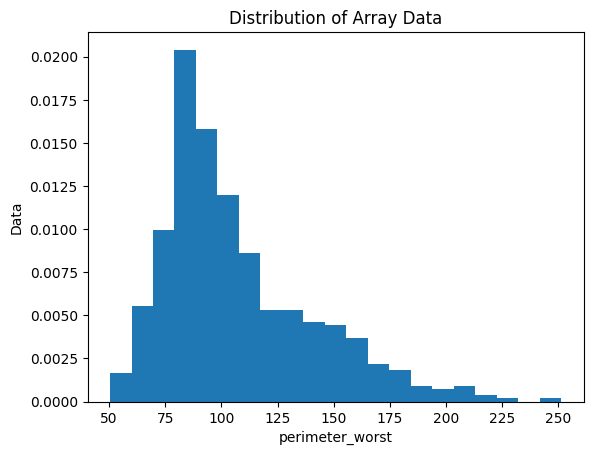

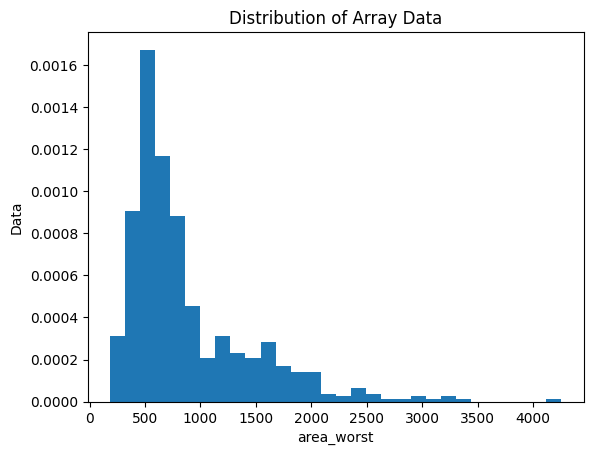

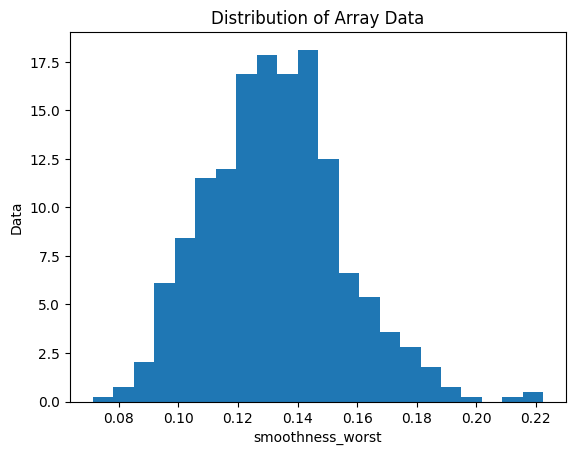

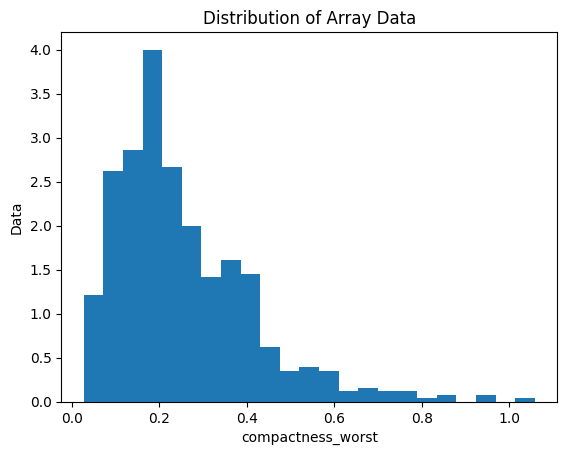

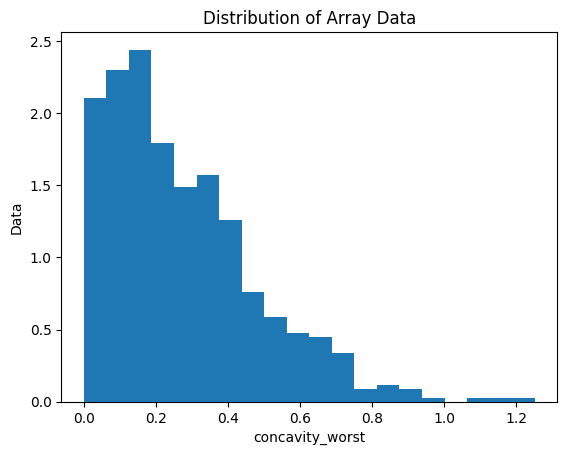

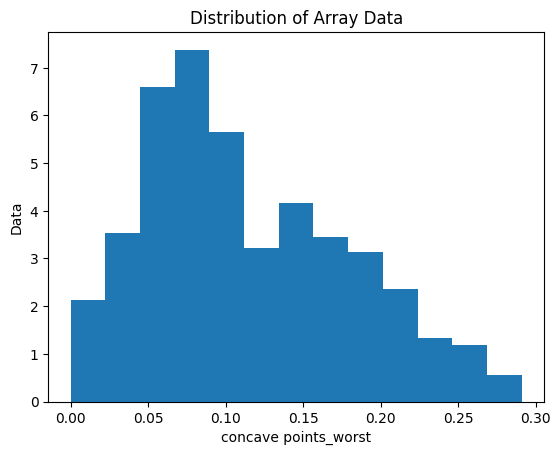

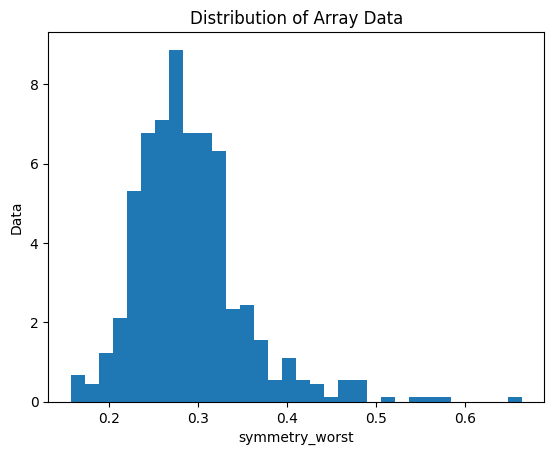

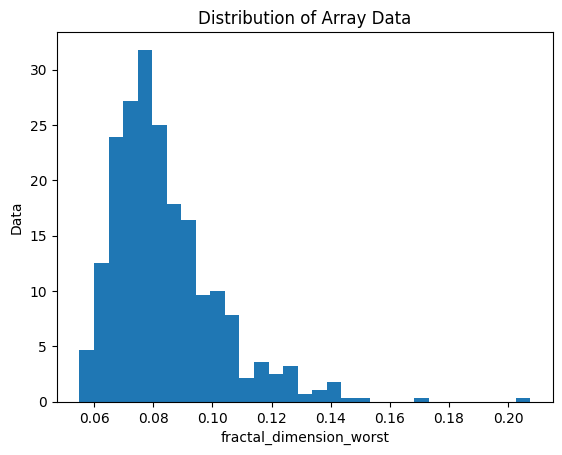

In [3]:
data = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
columns = data.columns[2:]

for i in range(len(columns)) :
    mean = data[columns[i]].mean()
    plot_hist(data[columns[i]].fillna(mean), columns[i])

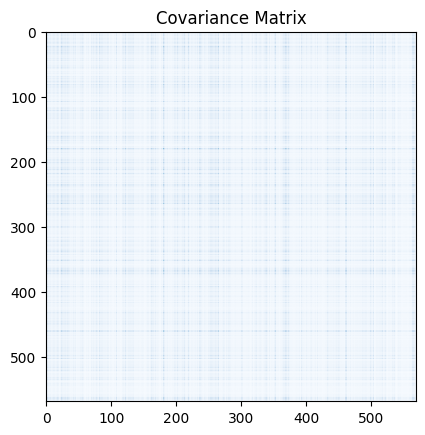

In [4]:
cmatrix = np.array([data[columns[i]].fillna(data[columns[i]].mean()) for i in range(len(columns))])
cmatrix = standardize(cmatrix)
cmatrix = cov_matrix(cmatrix)

plt.imshow( cmatrix, cmap='Blues' ) 
plt.title( "Covariance Matrix" )
plt.show()

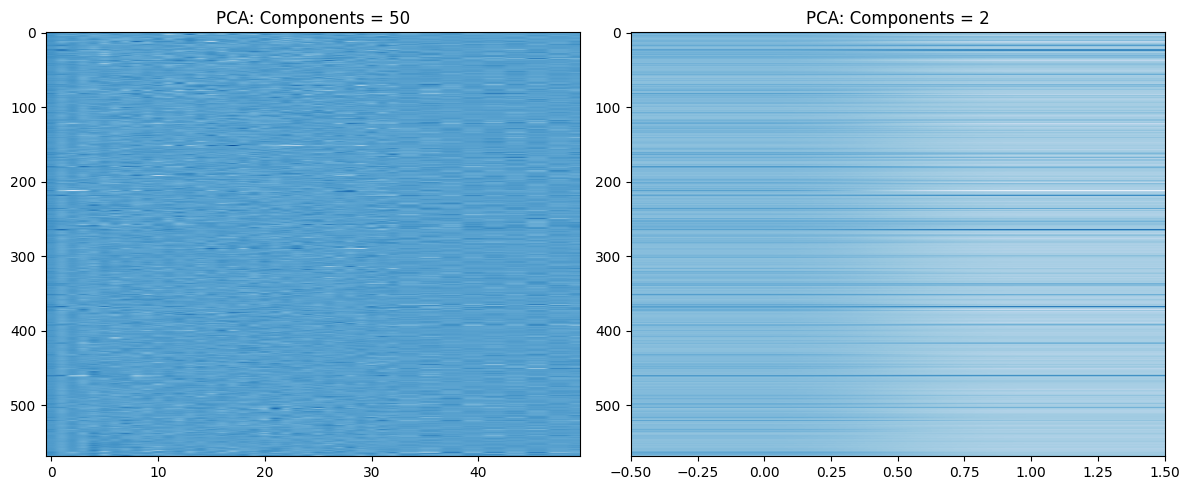

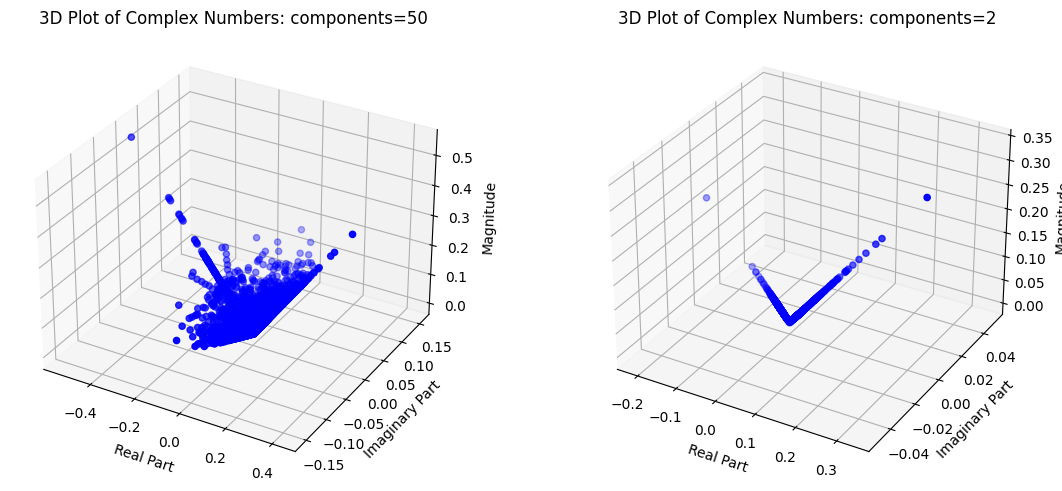

In [5]:
V, D = EigenDecomposition (cmatrix)
EDV = SortEigen (D, V)
PCAMatrix_2 = PCA(EDV, 2)
PCAMatrix_50 = PCA(EDV, 50)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(PCAMatrix_50.real, aspect='auto', cmap='Blues')
axs[0].set_title('PCA: Components = 50')
axs[1].imshow(PCAMatrix_2.real, aspect='auto', cmap='Blues')
axs[1].set_title('PCA: Components = 2')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})
axs[0].scatter(np.real(PCAMatrix_50), np.imag(PCAMatrix_50), np.abs(PCAMatrix_50), c='blue', marker='o')
axs[0].set_xlabel('Real Part')
axs[0].set_ylabel('Imaginary Part')
axs[0].set_zlabel('Magnitude')
axs[0].set_title('3D Plot of Complex Numbers: components=50')
axs[1].scatter(np.real(PCAMatrix_2), np.imag(PCAMatrix_2), np.abs(PCAMatrix_2), c='blue', marker='o')
axs[1].set_xlabel('Real Part')
axs[1].set_ylabel('Imaginary Part')
axs[1].set_zlabel('Magnitude')
axs[1].set_title('3D Plot of Complex Numbers: components=2')
plt.tight_layout()
plt.show()